# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

# 02. Importing Libraries

In [2]:
# Importing new geo file

us_geo = r'C:/Users/Rebecca/Library Funding and Literacy Rates/02 Data/Original Data/us-states.json'

In [3]:
us_geo

'C:/Users/Rebecca/Library Funding and Literacy Rates/02 Data/Original Data/us-states.json'

In [36]:
# Inspecting JSON
with open(r"C:/Users/Rebecca/Library Funding and Literacy Rates/02 Data/Original Data/us-states.json") as f:
    geo = json.load(f)

In [37]:
# See the first feature's properties
print(geo['features'][0]['properties'])

{'name': 'Alabama'}


In [5]:
path = r'C:\Users\Rebecca\Library Funding and Literacy Rates'

In [6]:
path

'C:\\Users\\Rebecca\\Library Funding and Literacy Rates'

In [7]:
df_county = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'county_prepared.csv'), index_col = False, encoding='latin1')

In [8]:
df_county.head()

,Unnamed: 0.1,Unnamed: 0,FIPS_code,State,County,grpName,Lit_P1,Lit_P2,Lit_P3,Lit_A,...,Unemployed,Not_in_labor,OCC_Manage,OCC_Service,OCC_Sales,OCC_Natural,OCC_Military,OCC_Prod,No_Insurance,Total Literacy Score
0,0,0,1001,Alabama,Autauga County,all,0.205,0.384,0.411,261.7,...,0.037,0.287,0.348,0.179,0.226,0.081,0.011,0.153,0.088,Average Literacy
1,1,1,1003,Alabama,Baldwin County,all,0.161,0.347,0.493,270.3,...,0.040,0.288,0.361,0.180,0.257,0.096,0.000,0.106,0.108,Average Literacy
2,2,2,1005,Alabama,Barbour County,all,0.394,0.404,0.201,235.9,...,0.073,0.444,0.254,0.168,0.225,0.114,0.000,0.239,0.123,Average Literacy
3,3,3,1007,Alabama,Bibb County,all,0.269,0.454,0.277,248.1,...,0.048,0.442,0.245,0.178,0.196,0.153,0.000,0.228,0.081,Average Literacy
4,4,4,1009,Alabama,Blount County,all,0.248,0.370,0.382,258.5,...,0.029,0.402,0.286,0.129,0.233,0.158,0.000,0.193,0.110,Average Literacy


In [9]:
df_county.shape

(34557, 42)

# 03. Data Wrangling

In [10]:
# Select only the necessary columns and put them in a list called columns

county_columns = [
    "State", 
    "Lit_P1", "Lit_P2", "Lit_P3", "Total Literacy Score",
    "Less_HS", "HS", "More_HS", "Employed", "Unemployed"
]

In [11]:
# Create a subset

state_rec = df_county[county_columns]

In [12]:
state_rec.head()

,State,Lit_P1,Lit_P2,Lit_P3,Total Literacy Score,Less_HS,HS,More_HS,Employed,Unemployed
0,Alabama,0.205,0.384,0.411,Average Literacy,0.123,0.336,0.541,0.662,0.037
1,Alabama,0.161,0.347,0.493,Average Literacy,0.098,0.278,0.624,0.670,0.040
2,Alabama,0.394,0.404,0.201,Average Literacy,0.269,0.355,0.376,0.483,0.073
3,Alabama,0.269,0.454,0.277,Average Literacy,0.179,0.439,0.383,0.511,0.048
4,Alabama,0.248,0.370,0.382,Average Literacy,0.202,0.323,0.475,0.568,0.029


In [13]:
type(state_rec)

pandas.core.frame.DataFrame

# 04. Consistency Checks

In [14]:
# Check for missing values

state_rec.isnull().sum()

State                   0
Lit_P1                  0
Lit_P2                  0
Lit_P3                  0
Total Literacy Score    0
Less_HS                 0
HS                      0
More_HS                 0
Employed                0
Unemployed              0
dtype: int64

In [15]:
# Check for duplicate values

dups = state_rec.duplicated()

In [16]:
dups

0        False
1        False
2        False
3        False
4        False
         ...  
34552    False
34553    False
34554    False
34555    False
34556    False
Length: 34557, dtype: bool

In [17]:
dups.shape

(34557,)

<Axes: xlabel='Lit_P1', ylabel='Count'>

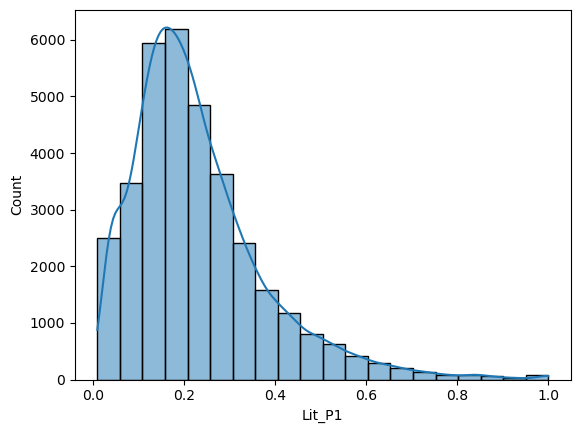

In [18]:
# Checking extreme values 

sns.histplot(state_rec['Lit_P1'], bins = 20, kde = True)

#### The histogram of Lit_P1 shows that most counties have between 15-20% of adults at or below Level 1 literacy, which is low literacy. The distribution appears right skewed.

<Axes: xlabel='Lit_P2', ylabel='Count'>

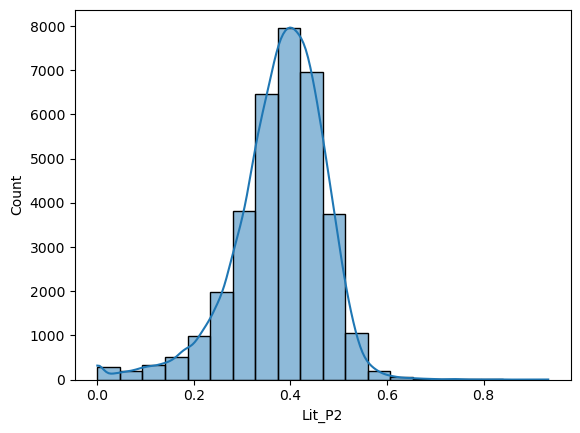

In [19]:
sns.histplot(state_rec['Lit_P2'], bins = 20, kde = True)

#### The histogram of Lit_P2 shows that most counties have between 30-50% of adults at or below Level 2 literacy, which is average literacy. The distribution appears right skewed.

<Axes: xlabel='Lit_P3', ylabel='Count'>

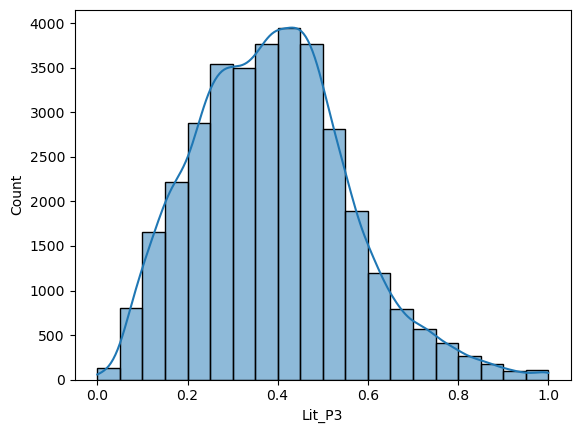

In [20]:
sns.histplot(state_rec['Lit_P3'], bins = 20, kde = True)

#### The histogram of Lit_P3 shows that most counties have between 25-50% of adults at or below Level 3 literacy, which is above average literacy. The distribution appears to be slightly right skewed.

<Axes: xlabel='Less_HS', ylabel='Count'>

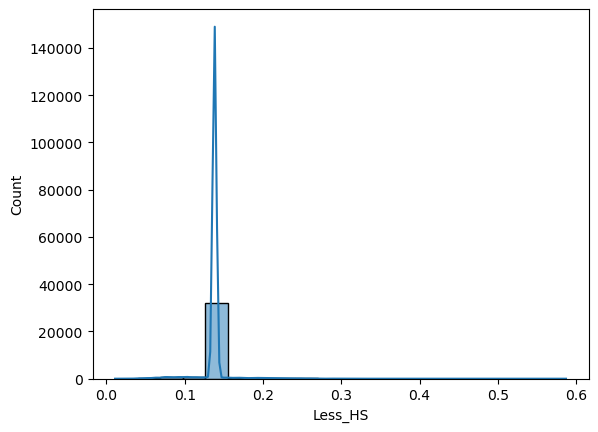

In [30]:
sns.histplot(state_rec['Less_HS'], bins = 20, kde = True)

#### Count of less than high school education is around 10-15%. 

<Axes: xlabel='HS', ylabel='Count'>

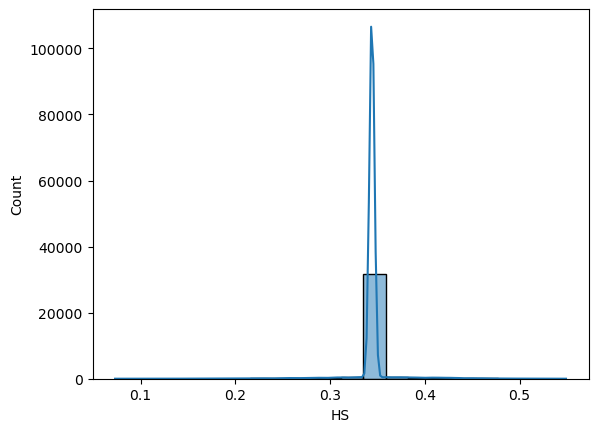

In [23]:
sns.histplot(state_rec['HS'], bins = 20, kde = True)

#### Count of high school education is around 35%. 

<Axes: xlabel='More_HS', ylabel='Count'>

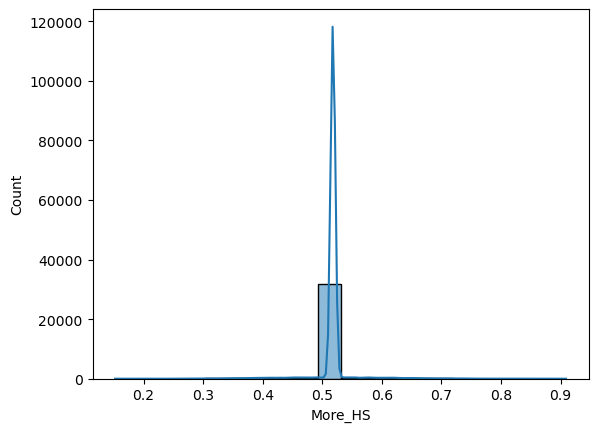

In [24]:
sns.histplot(state_rec['More_HS'], bins = 20, kde = True)

#### Count of more than high school education is around 50%. 

<Axes: xlabel='Employed', ylabel='Count'>

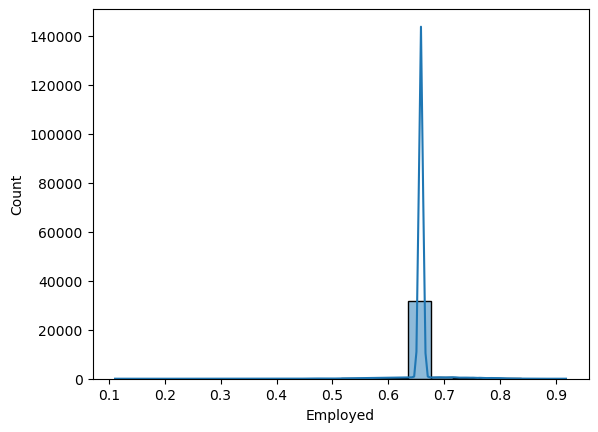

In [25]:
sns.histplot(state_rec['Employed'], bins = 20, kde = True)

#### Count of individual's employed is around 65%. 

<Axes: xlabel='Unemployed', ylabel='Count'>

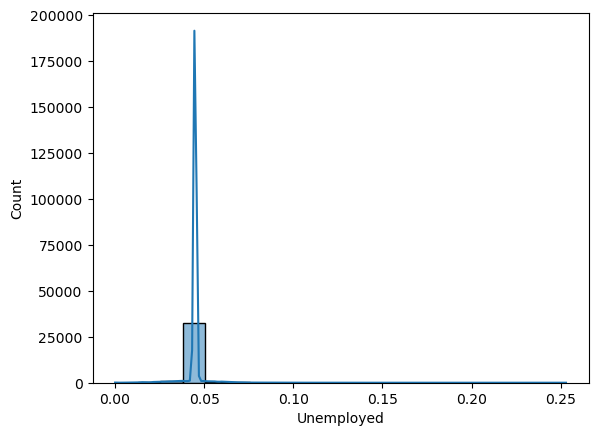

In [26]:
sns.histplot(state_rec['Unemployed'], bins = 20, kde = True)

#### Count of inviduals unemployed is less than .5%. 

#### Since I've had to impute almost all of my dataset, we knew from the beginning that there would more values that repeat which (I believe) has caused these extreme values. I'm going to leave these alone for now and for the purposes of this assignment, concentrate on the above literacy values. 

# 05. Plot a Choropleth Map 

In [39]:
# Create a data frame with State and Total Literacy Score

data_to_plot = state_rec[['State','Lit_P1']]
data_to_plot.head()

,State,Lit_P1
0,Alabama,0.205
1,Alabama,0.161
2,Alabama,0.394
3,Alabama,0.269
4,Alabama,0.248


In [40]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = us_geo, 
    data = data_to_plot,
    columns = ['State','Lit_P1'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Lit_P1").add_to(map)
folium.LayerControl().add_to(map)

map

In [41]:
map.save('Lit_P1.html')

### Lit_P1 Results: 

#### This map shows that Texas is the state with most individuals with Lit_P1 literacy. As a reminder, Lit_P1 description is - 
    Below Level 1: Can only understand very basic vocabulary or short phrases.
    At Level 1: Can read short texts and locate clearly stated information but struggle with complex sentences or inferences.
#### In summation, Texas has the largest population of individuals with the lowest literacy. 
    
#### Does the analysis answer any of your existing research questions?
    None of my research questions were regarding which states have the most individuals with the lowest literacy scores or vice versa, so this was a nice assignment to do to figure that out. While technically no, this doesn't answer my research questions, it does provide excellent insight and shows that Texas is a state to watch for while looking into my other research questions. I tried running additional maps for the two other literacy fields, but I couldn't get those to work. 
    
#### Does the analysis lead you to any new research questions?
    I'd like to know if Lit_P1 has foreign born individuals included (foreign born is a data point available), or if that population is indeed it's own, separate data value. Since Mexican immigrants come into the United States via Texas for work, perhaps this Lit_P1 value is biased and over-reporting lower literacy. Otherwise, understanding Texas' public library data is key. Politically speaking, Texas has always been very conservative/religious and a lot of laws (especially around education, literacy, and human rights) are very different compared to other states, especially Northern states, so unfortunately this data isn't that surprising.
